In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PairwiseAlignment import pairAlign
from sklearn.neighbors import KernelDensity

In [10]:
infile = "./tmp-shared-mutations/DO-051V1-CD24p-U_S143.V.clustalo.fasta.shared-mutations.csv"
outfile = infile + ".dist.csv"

In [2]:
df = pd.read_csv(infile, sep="\t")
print(len(df))
df.head()

264628


,Reference,Antibody 1,Antibody 2,Shared mutations,Perc AB1,Perc AB2
0,IGHV3-48*01,M02984:889:000000000-JGK5F:1:2113:19489:4999|D...,M02984:889:000000000-JGK5F:1:1113:26310:7459|D...,1,7.1,6.7
1,IGHV3-48*01,M02984:889:000000000-JGK5F:1:2113:19489:4999|D...,M02984:889:000000000-JGK5F:1:1101:19385:17737|...,1,7.1,5.0
2,IGHV3-48*01,M02984:889:000000000-JGK5F:1:2113:19489:4999|D...,M02984:889:000000000-JGK5F:1:2104:20675:13057|...,1,7.1,6.7
3,IGHV3-48*01,M02984:889:000000000-JGK5F:1:2113:19489:4999|D...,M02984:889:000000000-JGK5F:1:1117:20814:22061|...,0,0.0,0.0
4,IGHV3-48*01,M02984:889:000000000-JGK5F:1:2113:19489:4999|D...,M02984:889:000000000-JGK5F:1:1104:21407:6159|D...,0,0.0,0.0


In [3]:
get_cdr3 = lambda x: x.split("|")[-1].split(",")[0]
df["cdr3_AB1"] = [x for x in map(get_cdr3, df["Antibody 1"])]
df["cdr3_AB2"] = [x for x in map(get_cdr3, df["Antibody 2"])]
df.head()

,Reference,Antibody 1,Antibody 2,Shared mutations,Perc AB1,Perc AB2,cdr3_AB1,cdr3_AB2
0,IGHV3-48*01,M02984:889:000000000-JGK5F:1:2113:19489:4999|D...,M02984:889:000000000-JGK5F:1:1113:26310:7459|D...,1,7.1,6.7,TGTGCGAGAGAGGCGCTACTATGGTACGGGGACCAATACTACTTTG...,TGTGCGAGAGAGTATTTGATACCAGCTCCTACTATTGACTACTGGG...
1,IGHV3-48*01,M02984:889:000000000-JGK5F:1:2113:19489:4999|D...,M02984:889:000000000-JGK5F:1:1101:19385:17737|...,1,7.1,5.0,TGTGCGAGAGAGGCGCTACTATGGTACGGGGACCAATACTACTTTG...,TGTGCGAGAGATGCACGATATTTTGTCTTCTTTGACTACTGGGGCC...
2,IGHV3-48*01,M02984:889:000000000-JGK5F:1:2113:19489:4999|D...,M02984:889:000000000-JGK5F:1:2104:20675:13057|...,1,7.1,6.7,TGTGCGAGAGAGGCGCTACTATGGTACGGGGACCAATACTACTTTG...,TGTGCGAGAGAGTATTTGATACCAGCTCCTACTATTGACTACTGGG...
3,IGHV3-48*01,M02984:889:000000000-JGK5F:1:2113:19489:4999|D...,M02984:889:000000000-JGK5F:1:1117:20814:22061|...,0,0.0,0.0,TGTGCGAGAGAGGCGCTACTATGGTACGGGGACCAATACTACTTTG...,TGTGCGAGAGAACACGAGGGATACAGCTACTTTGACAAGTGGGGCC...
4,IGHV3-48*01,M02984:889:000000000-JGK5F:1:2113:19489:4999|D...,M02984:889:000000000-JGK5F:1:1104:21407:6159|D...,0,0.0,0.0,TGTGCGAGAGAGGCGCTACTATGGTACGGGGACCAATACTACTTTG...,TGTGCGAGAGATCGGGATAGCAGTGGCTGGTACGTGGGGGGGGACT...


In [4]:
pairAlign(df.iloc[0]['cdr3_AB1'], df.iloc[0]['cdr3_AB2']).distance

25

In [7]:
df_unique = df.groupby(["cdr3_AB1", "cdr3_AB2"]).agg({"Reference": len})
df_unique = df_unique.reset_index()
print(len(df_unique))
df_unique.head()

28450


,cdr3_AB1,cdr3_AB2,Reference
0,CGTGCGAGAGATCCCGCGGGCATAGAAGATTTTGACTACTGGGGCC...,M02984:889:000000000-JGK5F:1:2104:4964:,1
1,CGTGCGAGAGATCCCGCGGGCATAGAAGATTTTGACTACTGGGGCC...,TGCGCGAGAGACCCTAGCAGCAGTTGGATCCCCTTTGACTACTGGG...,1
2,CGTGCGAGAGATCCCGCGGGCATAGAAGATTTTGACTACTGGGGCC...,TGCGCGAGGAATAGTGGAACCTATCAAAATTTTGACTCCTGGGGCC...,1
3,CGTGCGAGAGATCCCGCGGGCATAGAAGATTTTGACTACTGGGGCC...,TGTACGAGGGGGCGTTTAGCAGTGGGTGGTTACGACTCCCGGGGCC...,1
4,CGTGCGAGAGATCCCGCGGGCATAGAAGATTTTGACTACTGGGGCC...,TGTGCAAAGGGGGGTATGGCCCACTTTGACTACTGGGGCCAGGGAA...,1


In [8]:
df_unique['cdr3_distance'] = [x.distance for x in map(pairAlign, df_unique['cdr3_AB1'], df_unique['cdr3_AB2'])]
df_unique.head()

,cdr3_AB1,cdr3_AB2,Reference,cdr3_distance
0,CGTGCGAGAGATCCCGCGGGCATAGAAGATTTTGACTACTGGGGCC...,M02984:889:000000000-JGK5F:1:2104:4964:,1,38
1,CGTGCGAGAGATCCCGCGGGCATAGAAGATTTTGACTACTGGGGCC...,TGCGCGAGAGACCCTAGCAGCAGTTGGATCCCCTTTGACTACTGGG...,1,15
2,CGTGCGAGAGATCCCGCGGGCATAGAAGATTTTGACTACTGGGGCC...,TGCGCGAGGAATAGTGGAACCTATCAAAATTTTGACTCCTGGGGCC...,1,15
3,CGTGCGAGAGATCCCGCGGGCATAGAAGATTTTGACTACTGGGGCC...,TGTACGAGGGGGCGTTTAGCAGTGGGTGGTTACGACTCCCGGGGCC...,1,20
4,CGTGCGAGAGATCCCGCGGGCATAGAAGATTTTGACTACTGGGGCC...,TGTGCAAAGGGGGGTATGGCCCACTTTGACTACTGGGGCCAGGGAA...,1,15


In [9]:
cols = ["cdr3_AB1", "cdr3_AB2", "cdr3_distance"]
df_unique = df_unique[cols]
df = pd.merge(df, df_unique, on=["cdr3_AB1", "cdr3_AB2"])
df.head()

,Reference,Antibody 1,Antibody 2,Shared mutations,Perc AB1,Perc AB2,cdr3_AB1,cdr3_AB2,cdr3_distance
0,IGHV3-48*01,M02984:889:000000000-JGK5F:1:2113:19489:4999|D...,M02984:889:000000000-JGK5F:1:1113:26310:7459|D...,1,7.1,6.7,TGTGCGAGAGAGGCGCTACTATGGTACGGGGACCAATACTACTTTG...,TGTGCGAGAGAGTATTTGATACCAGCTCCTACTATTGACTACTGGG...,25
1,IGHV3-48*01,M02984:889:000000000-JGK5F:1:2113:19489:4999|D...,M02984:889:000000000-JGK5F:1:2107:20751:7563|D...,1,7.1,6.7,TGTGCGAGAGAGGCGCTACTATGGTACGGGGACCAATACTACTTTG...,TGTGCGAGAGAGTATTTGATACCAGCTCCTACTATTGACTACTGGG...,25
2,IGHV3-48*01,M02984:889:000000000-JGK5F:1:2113:19489:4999|D...,M02984:889:000000000-JGK5F:1:1104:19098:5515|D...,1,7.1,5.6,TGTGCGAGAGAGGCGCTACTATGGTACGGGGACCAATACTACTTTG...,TGTGCGAGAGAGTATTTGATACCAGCTCCTACTATTGACTACTGGG...,25
3,IGHV3-48*01,M02984:889:000000000-JGK5F:1:2113:19489:4999|D...,M02984:889:000000000-JGK5F:1:1116:9288:23197|D...,1,7.1,6.7,TGTGCGAGAGAGGCGCTACTATGGTACGGGGACCAATACTACTTTG...,TGTGCGAGAGAGTATTTGATACCAGCTCCTACTATTGACTACTGGG...,25
4,IGHV3-48*01,M02984:889:000000000-JGK5F:1:2113:19489:4999|D...,M02984:889:000000000-JGK5F:1:1118:5665:15702|D...,1,7.1,6.7,TGTGCGAGAGAGGCGCTACTATGGTACGGGGACCAATACTACTTTG...,TGTGCGAGAGAGTATTTGATACCAGCTCCTACTATTGACTACTGGG...,25


In [11]:
df.to_csv(outfile, sep="\t", index=False)
print("Wrote", outfile, "to disk")

Wrote ./tmp-shared-mutations/DO-051V1-CD24p-U_S143.V.clustalo.fasta.shared-mutations.csv.dist.csv to disk


/home/barbera/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


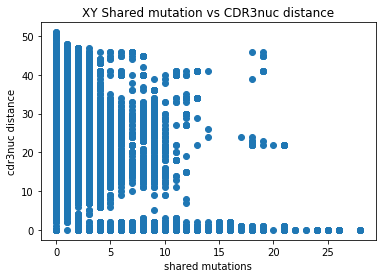

In [12]:
fig, ax = plt.subplots()
ax.scatter(df['Shared mutations'], df['cdr3_distance'])
plt.title("XY Shared mutation vs CDR3nuc distance")
plt.xlabel('shared mutations')
plt.ylabel('cdr3nuc distance')
fig.show()

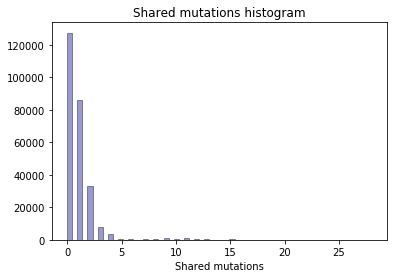

In [77]:
sns.distplot(df['Shared mutations'], hist=True, kde=False, 
             bins=60, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.title("Shared mutations histogram")
plt.show()

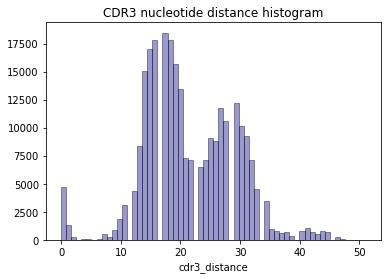

In [76]:
sns.distplot(df['cdr3_distance'], hist=True, kde=False, 
             bins=60, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.title("CDR3 nucleotide distance histogram")
plt.show()

## Check the nr of shared mutations between close CDR3s and distant CDR3s

In [15]:
df_close = df[df['cdr3_distance'] < 5]
df_distant = df[df['cdr3_distance'] >= 5]

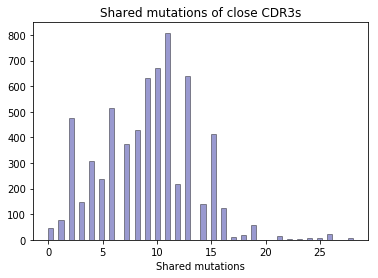

In [75]:
sns.distplot(df_close['Shared mutations'], hist=True, kde=False, 
             bins=60, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.title("Shared mutations of close CDR3s")
plt.show()

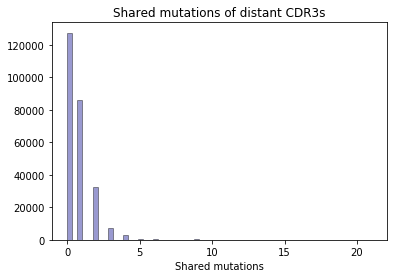

In [74]:
sns.distplot(df_distant['Shared mutations'], hist=True, kde=False, 
             bins=60, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.title("Shared mutations of distant CDR3s")
plt.show()

/home/barbera/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


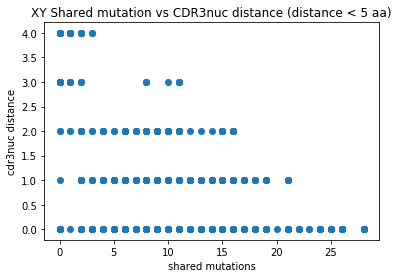

In [18]:
fig, ax = plt.subplots()
ax.scatter(df_close['Shared mutations'], df_close['cdr3_distance'])
plt.title("XY Shared mutation vs CDR3nuc distance (distance < 5 aa)")
plt.xlabel('shared mutations')
plt.ylabel('cdr3nuc distance')
fig.show()

/home/barbera/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


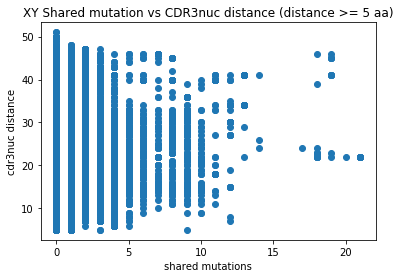

In [19]:
fig, ax = plt.subplots()
ax.scatter(df_distant['Shared mutations'], df_distant['cdr3_distance'])
plt.title("XY Shared mutation vs CDR3nuc distance (distance >= 5 aa)")
plt.xlabel('shared mutations')
plt.ylabel('cdr3nuc distance')
fig.show()

## Create function with combination of cdr3 distance and nr of shared mutations

In [218]:
w_cdr3 = 0.5
w_mut = 0.5
df["myfunc"] = list(w_cdr3 * (df['cdr3_distance'].max() - df['cdr3_distance']) + w_mut * df['Shared mutations'])

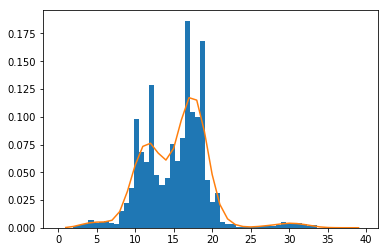

In [219]:
# fit density
sample = df['myfunc'].to_numpy()
model = KernelDensity(bandwidth=1, kernel='gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)
# sample probabilities for a range of outcomes
values = np.asarray([value for value in range(1, int(max(df['myfunc'])) + 1)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)
# plot the histogram and pdf
plt.hist(sample, bins=60, density=True)
plt.plot(values[:], probabilities)
plt.show()

In [220]:
# Calculate slopes
dydx = np.diff(probabilities)

In [221]:
# check if there are values that are zero
print("Zero's?", 0 in dydx)

# look for minimum and maximum values (dydx switches sign)
minima = list()
maxima = list()
newvalues = values[:-1]
for i in range(len(dydx)-1):
    j = i + 1
    if dydx[i] * dydx[j] < 0:
        # print(dydx[i], dydx[j], newvalues[i], newvalues[j])
        if dydx[i] < 0:
            minima.append(int(newvalues[j]))
        else:
            maxima.append(int(newvalues[j]))
print("Minima:", minima)
print("Maxima:", maxima)
threshold = minima[-1]
print("Threshold:", threshold)

Zero's? False
Minima: [14, 25]
Maxima: [12, 17, 30]
Threshold: 25


/home/barbera/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


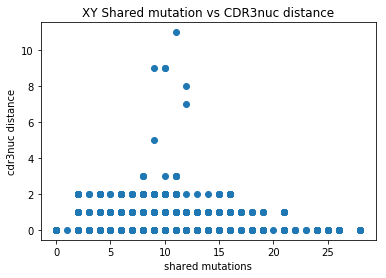

In [222]:
df_sel = df[df["myfunc"] > threshold]
fig, ax = plt.subplots()
ax.scatter(df_sel['Shared mutations'], df_sel['cdr3_distance'])
plt.title("XY Shared mutation vs CDR3nuc distance")
plt.xlabel('shared mutations')
plt.ylabel('cdr3nuc distance')
fig.show()

In [223]:
# Inspect entries with largest cdr3 distance
df_sel.sort_values(by='cdr3_distance', ascending=False).head()

,Reference,Antibody 1,Antibody 2,Shared mutations,Perc AB1,Perc AB2,cdr3_AB1,cdr3_AB2,cdr3_distance,myfunc
89605,IGHV3-48*01,M02984:889:000000000-JGK5F:1:1116:5368:10232|D...,M02984:889:000000000-JGK5F:1:1118:23809:21155|...,11,52.4,36.7,TGTGCGAGGAACTGGGGGAGAATGGACTACTGGGGCCAGGGAACCC...,TGTGCGAGATATAGTGGGAACTACTCTGACTACTGGGGCCAGGGAA...,11,25.5
145284,IGHV3-48*01,M02984:889:000000000-JGK5F:1:1108:14913:9794|D...,M02984:889:000000000-JGK5F:1:1115:13831:5068|D...,9,39.1,45.0,TGTGCGACATATAACAGCCCGCACTACTTTGACTACTGGGGCCAGG...,TGTGCGAGAGATTACCCCGACACCCACTTCGACTACTGGGGCCAGG...,9,25.5
138764,IGHV3-48*01,M02984:889:000000000-JGK5F:1:1117:17077:18382|...,M02984:889:000000000-JGK5F:1:1117:5761:11393|D...,10,27.8,83.3,TGTGCGAGATCAGTGGAAGGCCACTTTGACTACTGGGGCCAGGGAA...,TGTGCGAGATATAGTGGCAACGATCACTACTGGGGCCAGGGAACCC...,9,26.0
149246,IGHV3-48*01,M02984:889:000000000-JGK5F:1:1108:14913:9794|D...,M02984:889:000000000-JGK5F:1:1118:23809:21155|...,10,43.5,33.3,TGTGCGACATATAACAGCCCGCACTACTTTGACTACTGGGGCCAGG...,TGTGCGAGATATAGTGGGAACTACTCTGACTACTGGGGCCAGGGAA...,9,26.0
90067,IGHV3-48*01,M02984:889:000000000-JGK5F:1:1116:5368:10232|D...,M02984:889:000000000-JGK5F:1:1112:14123:15539|...,12,57.1,25.5,TGTGCGAGGAACTGGGGGAGAATGGACTACTGGGGCCAGGGAACCC...,TGTGTAAGAGATCTGAGGGAGGGGGACTACTGGGGCCAGGGAACCC...,8,27.5


## Create clonal groups

In [224]:
import igraph
import math

In [225]:
# Create nodes in a graph
ids = list(set(list(df_sel['Antibody 1']) + list(df_sel['Antibody 2'])))
g = igraph.Graph(len(ids), directed=False)
g.vs["id"] = range(len(ids))
g.vs["name"] = ids
g.vs["label"] = ids
#g.vs["freq"] = freqs
#g.vs["size"] = [math.log(f) for f in freqs]

In [226]:
# Add the vertex numbers to the dataframe
df_ids = pd.DataFrame({'idx': range(len(ids)), 'antibody': ids})
df_sel = pd.merge(df_sel, df_ids, left_on="Antibody 1", right_on="antibody")
df_sel = df_sel.rename(columns={'idx': 'idx_AB1'})
df_sel = pd.merge(df_sel, df_ids, left_on="Antibody 2", right_on="antibody")
df_sel = df_sel.rename(columns={'idx': 'idx_AB2'})

In [227]:
# Add edges to the graph
for index, row in df_sel.iterrows():
    g.add_edge(row['idx_AB1'], row['idx_AB2'], weight=1)

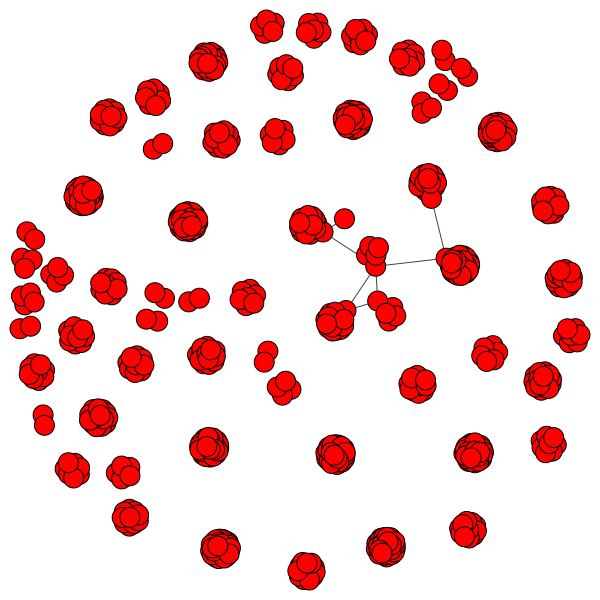

In [228]:
# Plot the graph
w = 10
h = 10
d = 70
plt.figure(figsize=(w, h), dpi=d)
igraph.plot(g, vertex_label=None)

In [229]:
# Get clusters of connected nodes
g_clusters = g.clusters(mode="strong")
cluster_id = list()
cluster_size = list()
vertex_id = list()
vertex_name = list()

i = 0
for c in g_clusters:
    size = len(c)
    for node in c:
        cluster_id.append(i)
        cluster_size.append(size)
        vertex_id.append(node)
        vertex_name.append(ids[node])
    i = i + 1
    
df_clusters = pd.DataFrame({'cluster_id': cluster_id, 'cluster_size': cluster_size, 'vertex_id': vertex_id, 'vertex_name': vertex_name})
df_clusters = df_clusters.sort_values(by=['cluster_size', 'cluster_id'], ascending=False)
df_clusters.head(25)

,cluster_id,cluster_size,vertex_id,vertex_name
273,16,103,23,M02984:889:000000000-JGK5F:1:1103:11795:9052|D...
274,16,103,25,M02984:889:000000000-JGK5F:1:2104:23863:15441|...
275,16,103,35,M02984:889:000000000-JGK5F:1:2113:17655:19671|...
276,16,103,53,M02984:889:000000000-JGK5F:1:2110:23218:8575|D...
277,16,103,61,M02984:889:000000000-JGK5F:1:1110:23791:18954|...
278,16,103,65,M02984:889:000000000-JGK5F:1:1116:23038:18706|...
279,16,103,67,M02984:889:000000000-JGK5F:1:1112:14123:15539|...
280,16,103,70,M02984:889:000000000-JGK5F:1:2103:12476:14931|...
281,16,103,80,M02984:889:000000000-JGK5F:1:2105:25161:20500|...
282,16,103,84,M02984:889:000000000-JGK5F:1:2101:25226:10989|...


In [230]:
i = 0
for index, row in df_clusters.iterrows():
    print(row['cluster_id'], row['cluster_size'], row['vertex_name'])
    i = i + 1
    if i > 10:
        break

16 103 M02984:889:000000000-JGK5F:1:1103:11795:9052|DO-051V1-CD24p-U_S143|TGTGCGACATATAACAGCCCGCACTACTTTGACTACTGGGGCCAGGGAACCCTGGTCACC
16 103 M02984:889:000000000-JGK5F:1:2104:23863:15441|DO-051V1-CD24p-U_S143|TGTGCGAGAGATTACCCCGAAACCCACTTCGACTACTGGGGCCAGGGAACCCTGGTCAC
16 103 M02984:889:000000000-JGK5F:1:2113:17655:19671|DO-051V1-CD24p-U_S143|TGTGCGACATATAACAGCCCGCACTACTTTGACTACTGGGGCCAGGGAACCCTGGTCAC
16 103 M02984:889:000000000-JGK5F:1:2110:23218:8575|DO-051V1-CD24p-U_S143|TGTGCGACATATAACAGCCCGCACTACTTTGACTACTGGGGCCAGGGAACCCTGGTCACC
16 103 M02984:889:000000000-JGK5F:1:1110:23791:18954|DO-051V1-CD24p-U_S143|TGTGCGAGGAACTGGGGGAGAATGGACTACTGGGGCCAGGGAACCCTGGTCACC
16 103 M02984:889:000000000-JGK5F:1:1116:23038:18706|DO-051V1-CD24p-U_S143|TGTGCGAGATATAGTGGCAACGATCACTACTGGGGCCAGGGAACCCTGGTCACC
16 103 M02984:889:000000000-JGK5F:1:1112:14123:15539|DO-051V1-CD24p-U_S143|TGTGTAAGAGATCTGAGGGAGGGGGACTACTGGGGCCAGGGAACCCTGGTCACC
16 103 M02984:889:000000000-JGK5F:1:2103:12476:14931|DO-051V1-CD24p-U_